In [32]:
url = "https://pixees.fr/informatiquelycee/n_site/asset/titanic.csv"

In [33]:
import pandas as pd
import numpy as np
import matplotlib as plt
titanic = pd.io.parsers.read_csv(url)

In [34]:
titanic.head()

PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S

In [35]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [36]:
titanic = titanic.drop(['Name', 'PassengerId', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], axis=1)

In [37]:
titanic.tail()

Survived  Pclass     Sex   Age
886         0       2    male  27.0
887         1       1  female  19.0
888         0       3  female   NaN
889         1       1    male  26.0
890         0       3    male  32.0

In [38]:
titanic = titanic.dropna(axis=0)

In [39]:
titanic.describe()

Survived      Pclass         Age
count  714.000000  714.000000  714.000000
mean     0.406162    2.236695   29.699118
std      0.491460    0.838250   14.526497
min      0.000000    1.000000    0.420000
25%      0.000000    1.000000   20.125000
50%      0.000000    2.000000   28.000000
75%      1.000000    3.000000   38.000000
max      1.000000    3.000000   80.000000

In [40]:
titanic['Pclass'].value_counts()

3    355
1    186
2    173
Name: Pclass, dtype: int64

<Axes: >

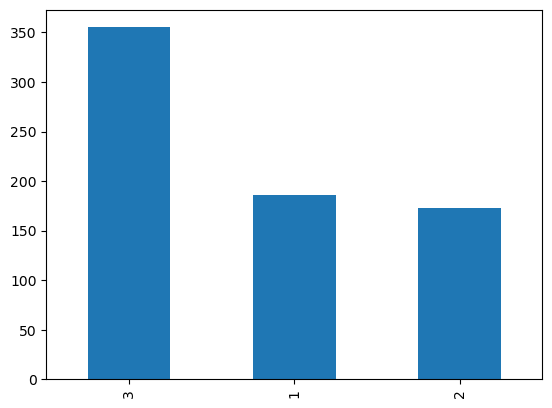

In [41]:
titanic['Pclass'].value_counts().plot.bar()

<Axes: >

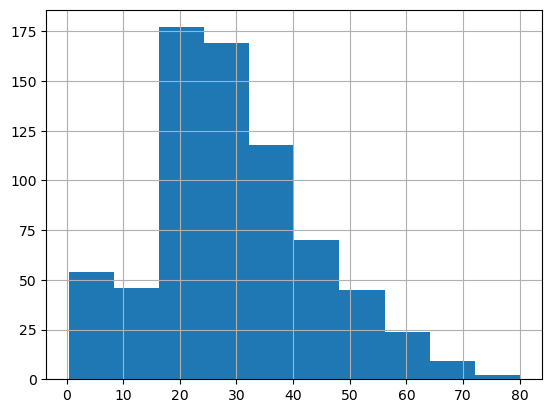

In [42]:
titanic['Age'].hist()

In [43]:
titanic.groupby(['Sex']).mean()

Survived    Pclass        Age
Sex                                  
female  0.754789  2.065134  27.915709
male    0.205298  2.335541  30.726645

In [44]:
titanic['Sex'].replace(['male', 'female'], [0, 1], inplace = True)
titanic.head()

Survived  Pclass  Sex   Age
0         0       3    0  22.0
1         1       1    1  38.0
2         1       3    1  26.0
3         1       1    1  35.0
4         0       3    0  35.0

In [45]:
from sklearn.neighbors import KNeighborsClassifier

In [46]:
model = KNeighborsClassifier()

In [52]:
Y = titanic['Survived']

In [53]:
X = titanic.drop('Survived',axis=1)

In [54]:
Y

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64

In [55]:
X

Pclass  Sex   Age
0         3    0  22.0
1         1    1  38.0
2         3    1  26.0
3         1    1  35.0
4         3    0  35.0
..      ...  ...   ...
885       3    1  39.0
886       2    0  27.0
887       1    1  19.0
889       1    0  26.0
890       3    0  32.0

[714 rows x 3 columns]

In [56]:
model.fit(X, Y)
model.score(X, Y)

0.8305322128851541

In [57]:
model.predict(X)

array([0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,

In [60]:
def survie(model, pclass=3, Sex=0, Age=26):
    X = np.array([pclass, Sex, Age]).reshape(1, 3)
    print(model.predict_proba(X))

In [61]:
survie(model)

[[0.6 0.4]]


/opt/mamba/lib/python3.10/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
